# 패턴인식 설계 과제
# <한국어 문장 긍정,부정문 이진분류>
## 단국대학교 컴퓨터공학과 정민준
jmj284@gmail.com<br> 
010-9391-0801

# <모델 학습 및 테스트 코드>

##<학습 및 테스트 환경> <br>
본 프로그램은 'Google Colab' 환경에서 작성 되었습니다.<br>
플랫폼: 'Goolge Colab'<br> 
GPU: Tesla T4<br> 
GPU API: cuda<br>
<br>사용한 언어 및 라이브러리는 아래와 같습니다.
<br>

## <언어> <br>

###1. python3
Version: 3.7.14 (default, Sep  8 2022, 00:06:44)<br>
GCC 7.5.0<br>

## <라이브러리> <br>

###1. transformers
Version: 4.23.1<br> 
License: Apache<br>

###2. torch
Version: 1.12.1+cu113<br>
License: BSD-3<br>

###3. tensorflow)<br>
Version: 2.9.2<br>
License: Apache 2.0<br>

###4. keras
Version: 2.9.0<br>
License: Apache 2.0<br>

###5. scikit-learn
Version: 1.0.2<br>
License: new BSD<br>

###6. pandas
Version: 1.3.5<br> 
License: BSD-3-Clause<br>

###7. numpy
Version: 1.21.6<br>
License: BSD<br>

###8. matplotlib
Version: 3.2.2<br> 
License: PSF<br>

## <사전학습모델> 
KoBERT-Transfomers<br>
License: Apache 2.0

## <참고자료>

1. https://mccormickml.com/2019/07/22/BERT-fine-tuning/

2. https://github.com/monologg/KoBERT-Transformers/blob/master/kobert_transformers/tokenization_kobert.py

3. https://velog.io/@seolini43/일상연애-주제의-한국어-대화-BERT로-이진-분류-모델-만들기파이썬Colab-코드





## 1. Colab 환경 설정

In [1]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers
!pip install torch
!pip3 install kobert-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 1.2 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 10.0 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595737 sha256=67dcf0aea79502b47e57bc16cabab570b144135d4d8f661351a073d64f3788a9
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 36.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.p

In [2]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.1.97
    Uninstalling sentencepiece-0.1.97:
      Successfully uninstalled sentencepiece-0.1.97
  Attempting uninstall: mxnet
    Found existing installation: mxnet 1.9.1
    Uninstalling mxnet-1.9.1:
      Successfully uninstalled mxnet-1.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.10.1 which is incompatible.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.10.1 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.10.1 which is incompatible.


In [3]:
import tensorflow as tf
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pandas as pd
from transformers import BertTokenizer
import csv
import numpy as np
import random
import time
import datetime

In [4]:
# GPU 확인하기
n_devices = torch.cuda.device_count()
print(n_devices)

for i in range(n_devices):
    print(torch.cuda.get_device_name(i))

1
Tesla T4


In [5]:
#코랩 환경에서 구글 드라이브 사용시 마운트 필요, 불필요 혹은 오류 발생시 주석 처리 후 실행
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [6]:
#라이브러리 버전 확인, 확인 필요시 주석 제거 후 사용

import sys
'''
print(sys.version)
print()
!pip show transformers
print()
!pip show torch
print()
!pip show tensorflow
print()
!pip show keras 
print()
!pip show scikit-learn 
print()
!pip show pandas
print()
!pip show numpy
print()
!pip show matplotlib
'''

'\nprint(sys.version)\nprint()\n!pip show transformers\nprint()\n!pip show torch\nprint()\n!pip show tensorflow\nprint()\n!pip show keras \nprint()\n!pip show scikit-learn \nprint()\n!pip show pandas\nprint()\n!pip show numpy\nprint()\n!pip show matplotlib\n'

## 2-(a). 새로운 DataSet 불러오기 및 분할

In [ ]:
import csv

data_path = '/drive/MyDrive/final model_upload/TrainSet _1차.csv'

print("#################<데이터 호출>#################")
print()
print("예시) /drive/MyDrive/final model_upload/TrainSet _1차.csv")
data_path = input("위의 예시와 같이 학습에 이용할 Data Set 파일이 존재하는 디렉토리의 경로를 입력하세요: ")
print()
print("##########################################")
data = pd.read_csv(data_path,encoding="utf-8")
print("데이터 셋 호출 성공!")

#################<데이터 호출>#################

예시) /drive/MyDrive/final model_upload/TrainSet _1차.csv
위의 예시와 같이 학습에 이용할 Data Set 파일이 존재하는 디렉토리의 경로를 입력하세요: /content/result.csv

##########################################
데이터 셋 호출 성공!


In [ ]:
#데이터의 쉐입 및 출력 결과 확인
data.shape
data.sample(n=5)

In [ ]:
data_shuffled = data.sample(frac=1).reset_index(drop=True) #데이터 랜덤으로 셔플

In [ ]:
#train data & test data 설정
x = len(data_shuffled) #0 ~ x 까지 학습 데이터, x~끝 까지 테스트 데이터, x데이터 사용자 임의 설정

print("#################<학습 데이터, 테스트 데이터 범위 지정>#################")
print()
print("현재 데이터의 전체 길이: ",x)
print("0 ~ x 까지 학습 데이터, x ~ 끝 까지 테스트 데이터, x데이터 사용자 임의 설정")
x = input("데이터의 범위(x)를 입력하세요(-1 입력시 전체 데이터 학습): ")

if x == '-1':
  x = len(data_shuffled)
else:
  x = int(x)   

train = data_shuffled[:x]
test = data_shuffled[x:]


In [ ]:
train.to_csv('train_data.csv')
test.to_csv('test_data.csv')

In [ ]:
#테스트 및 훈련 데이터의 쉐입 및 출력 결과 확인
print(train.shape)
print(test.shape)

display(train.head())
display(test.head())

## 2-(b). 기존 DataSet 활용

In [7]:
import csv
train = pd.read_csv('/drive/MyDrive/kor_bin_data/train_data.csv',encoding="utf-8")
test = pd.read_csv('/drive/MyDrive/kor_bin_data/test_data.csv',encoding="utf-8")

## 3. Train Set 전처리

In [8]:
#BERT 모델에 이용하기 위한 Test Set의 전처리

# CLS, SEP 붙이기 (문장의 시작, 끝 구분)
sentences = ["[CLS] " + str(s) + " [SEP]" for s in train.Sentences]

#결과 라벨 할당
labels = train['Emotions'].values



In [9]:
!pip install kobert-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from kobert_transformers import get_tokenizer

#사전학습모델 bert-base-multilingual-cased 설치 및 사용, License: Apache 2.0
tokenizer = get_tokenizer()
tokenized_texts = [tokenizer.tokenize(s) for s in sentences] #토큰화

print(sentences[0])  #토크나이징 전
print(tokenized_texts[0]) #토크나이징 후

Downloading:   0%|          | 0.00/371k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

[CLS] 새로 산 자동차 앞 좌석 시트에 친한 친구가 커피를 쏟아서 너무 짜증이 나. [SEP]
['[CLS]', '▁새로', '▁산', '▁자동차', '▁앞', '▁좌', '석', '▁시', '트', '에', '▁친', '한', '▁친구', '가', '▁커피', '를', '▁쏟아', '서', '▁너무', '▁짜', '증', '이', '▁나', '.', '[SEP]']


In [11]:
# 토큰화 된 문장중 시퀀스가 가장 긴 문장의 길이가 얼마인지 판단
l = 0
for i in tokenized_texts:
  if len(i) > l:
    l = len(i)
print("최대 시퀀스 길이: ",l)    

최대 시퀀스 길이:  143


In [12]:
#시퀀스 설정 및 정수 인덱스 변환 & 패딩
#최대 시퀀스 길이, bert모델의 인식 가능한 최대 길이가 512, 따라서 CLS와 SEP를 빼고 510까지 할당 가능
MAX_LEN = 150
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# 어텐션 마스크
attention_masks = []
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])
print('input_ids[0]:',input_ids[0])


# 파이토치 텐서로 변환
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids,
                                                                                    labels, 
                                                                                    random_state=2000, 
                                                                                    test_size=0.1)

train_masks, validation_masks, _, _ = train_test_split(attention_masks, 
                                                       input_ids,
                                                       random_state=2000, 
                                                       test_size=0.1)

train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)

validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
input_ids[0]: [   2 2698 2640 3893 3184 4211 6557 2959 7659 6896 4626 7828 4627 5330
 4656 6116 3083 6553 1458 4396 7316 7096 1370   54    3    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  

In [13]:
# 배치 사이즈 설정 및 데이터 설정
batch_size = 64

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

## 5. 모델 생성

In [14]:
#코랩 환경에서 gpu 사용가능 여부를 판별 및 device 할당 위해서 사용

if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')


There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [15]:
#코랩 환경에서 gpu 캐시 초기화를 위해서 사용, 필요시 주석 제거하고 사용, 오류 발생시 주석 처리 필요
import torch, gc
gc.collect()
torch.cuda.empty_cache()


In [ ]:
#사전학습모델 kobert 설치 및 사용, License: Apache 2.0
from kobert_transformers import get_kobert_model
#model1 = get_kobert_model()
model = BertForSequenceClassification.from_pretrained("monologg/kobert")
model.cuda()

In [18]:
# 옵티마이저
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률(learning rate)
                  eps = 1e-8 
                )

# 에폭수
epochs = 6

# 총 훈련 스텝 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 스케줄러 생성
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)


## 6. 모델 학습 및 저장

In [19]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)
    
    
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [20]:
#랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

#그래디언트 초기화
model.zero_grad()

# 학습 # 배치 사이즈 = 64, epoch = 10 
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음 #배치사이즈 16
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행                
        outputs = model(b_input_ids,token_type_ids=None,
                        attention_mask=b_input_mask,labels=b_labels)
        
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 6 ========
Training...
  Batch   500  of    830.    Elapsed: 0:14:32.

  Average training loss: 0.37
  Training epcoh took: 0:24:14

Running Validation...
  Accuracy: 0.88
  Validation took: 0:01:01

======== Epoch 2 / 6 ========
Training...
  Batch   500  of    830.    Elapsed: 0:14:42.

  Average training loss: 0.25
  Training epcoh took: 0:24:23

Running Validation...
  Accuracy: 0.89
  Validation took: 0:01:00

======== Epoch 3 / 6 ========
Training...
  Batch   500  of    830.    Elapsed: 0:14:41.

  Average training loss: 0.19
  Training epcoh took: 0:24:23

Running Validation...
  Accuracy: 0.89
  Validation took: 0:01:00

======== Epoch 4 / 6 ========
Training...
  Batch   500  of    830.    Elapsed: 0:14:42.

  Average training loss: 0.14
  Training epcoh took: 0:24:23

Running Validation...
  Accuracy: 0.89
  Validation took: 0:01:00

======== Epoch 5 / 6 ========
Training...
  Batch   500  of    830.    Elapsed: 0:14:40.

  Average training loss: 0.11
  T

In [25]:
#모델 저장
#s_path 변수에 모델 저장경로 삽입 총 2개의 파일이 저장되어야 함.

s_path = '/drive/MyDrive/P_OR_N_MODEL'

print("#################<모델 저장>#################")
print()
print("<경로에 저장 돼야 하는 파일들>")
print("1. config.json")
print("2. pytorch_model.bin")
print()
print("예시) /drive/MyDrive/submit_model")
#s_path = input('모델을 저장할 주소를 입력하세요: ')
print()
print("#########################################")

model.save_pretrained(s_path) #모델저장

#모델 전체 저장
torch.save(model,s_path +'/model.pt')

print("모델 저장 완료!")

#################<모델 저장>#################

<경로에 저장 돼야 하는 파일들>
1. config.json
2. pytorch_model.bin
3. special_tokens_map.json
4. tokenizer_config.json
5. vocab.txt

예시) /drive/MyDrive/submit_model

#########################################
모델 저장 완료!


## 7. 테스트셋 평가

In [27]:
#시그모이드
def sigmoid(x): 
    return 1.0/(1 + np.exp(-x))

def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))


test_ans = [] #모델의 결과 저장
test_prob = [] #가능성 저장

#시작 시간 설정
t0 = time.time()

#테스트셋 데이터 전처리
def convert_input_data(sentences):
    sentences = ["[CLS] " + str(sentences) + " [SEP]"]

    # BERT의 토크나이저로 문장을 토큰으로 분리
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이
    MAX_LEN = 150

    # 토큰을 숫자 인덱스로 변환
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    
    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    return inputs, masks

#모델 사용
def Emotion_Binary_Classification(sentences):

    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)
            
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()
    
    #시그모이드 함수, 확률 판단
    pred = sigmoid(logits)
    
    #결과 판단
    result = np.argmax(pred)

    return [result,pred]

#이진 분류 결과(0 or 1)이 담길 정답 리스트
test_ans = []

#이진 분류 결과의 확률([0~1,0~1])이 담길 정답 리스트
test_prob = []

#입력 데이터
d = test.Sentences
d.reset_index(drop=True, inplace=True)

#실제 정답 
labels = test.Emotions

for i in range(len(d)):
  #함수 호출, 이진분류 결과는 a, 확률은 p
  a,p = Emotion_Binary_Classification(d[i])
  test_ans.append(a) #결과 값은 test_ans에 저장
  test_prob.append(p) #확률 값은 test_prob에 저장

print("분류에 소요된 시간: {:}".format(format_time(time.time() - t0)))

분류에 소요된 시간: 0:02:24


총 학습 데이터의 수: 59000
총 테스트 데이터의 수:  9113
Accuracy : 0.898167
AUC Score: 0.955392



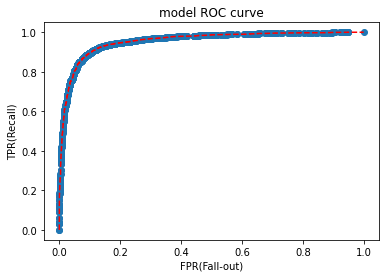

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#probabilty중 정답이 1일 확률이 담길 리스트 
t_prob =[]
print('총 학습 데이터의 수:',len(train))
print('총 테스트 데이터의 수: ', len(test_prob))

#probabilty중 정답이 1일 확률(model.predict_proba() 와 동일)
for i in test_prob:
  t_prob.append(i[0][1])

cnt = 0
for i in range(len(test_ans)):
  if test_ans[i] == labels[i]:
      cnt += 1

print('Accuracy :',round(cnt/len(test_ans),6))      
# roc_curve 그래프 그리기
fpr, tpr, thresholds = roc_curve(labels, t_prob)

roc = pd.DataFrame({'FPR(Fall-out)': fpr, 'TPRate(Recall)': tpr, 'Threshold': thresholds})

plt.scatter(fpr, tpr)
plt.title('model ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');
plt.plot(fpr, tpr, 'r--')

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 최적의 threshold
#print('idx:',optimal_idx, 'threshold:', optimal_threshold)

# AUC 면적 구하기
auc_score = roc_auc_score(labels, t_prob)
print('AUC Score:',round(auc_score,6))
print()